In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import mygene
import os
pd.set_option('display.max_columns', None)

# Set the working directory
working_dir = "/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_Snords"
os.chdir(working_dir)
print(f"Current working directory: {os.getcwd()}")

from functions import check_dexseq_results


Current working directory: /beegfs/scratch/ric.broccoli/kubacki.michal/SRF_Snords


# Examind the data

In [2]:
# Example usage
results_file = "output/dexseq_results_PW1_vs_combined_controls.csv"
df = pd.read_csv(results_file)

In [3]:
df.head()

,Unnamed: 0,groupID,featureID,exonBaseMean,dispersion,stat,pvalue,padj,control,treated,log2fold_treated_control,genomicData.seqnames,genomicData.start,genomicData.end,genomicData.width,genomicData.strand,countData.EDO_1,countData.EDO_2,countData.EDO_3,countData.ND1_1,countData.ND1_2,countData.ND1_3,countData.PW1_1,countData.PW1_2,countData.PW1_3
0,ENSG00000000003.15:E001,ENSG00000000003.15,E001,9.064419,0.016163,3928.904378,0.000000e+00,0.000000e+00,5.931265,5.009454,-0.513830,chrX,100627108,100627108,1,-,10,12,6,2,10,8,12,10,14
1,ENSG00000000003.15:E002,ENSG00000000003.15,E002,1364.225638,0.007380,465.843450,6.972364e-102,8.791361e-102,31.857029,31.513293,-0.075000,chrX,100627109,100629986,2878,-,1106,1345,750,970,1266,1057,1521,2781,2375
2,ENSG00000000003.15:E003,ENSG00000000003.15,E003,443.805530,0.009201,1962.650578,0.000000e+00,0.000000e+00,24.503872,24.252599,-0.056804,chrX,100630759,100630866,108,-,375,434,254,277,397,359,471,926,802
3,ENSG00000000003.15:E004,ENSG00000000003.15,E004,1.978581,0.020921,3476.876104,0.000000e+00,0.000000e+00,2.634388,2.801898,0.180282,chrX,100632063,100632068,6,-,1,2,1,1,4,0,2,5,4
4,ENSG00000000003.15:E005,ENSG00000000003.15,E005,330.134019,0.007735,2830.512068,0.000000e+00,0.000000e+00,22.609421,22.418042,-0.044010,chrX,100632485,100632540,56,-,269,321,184,215,299,267,354,675,613


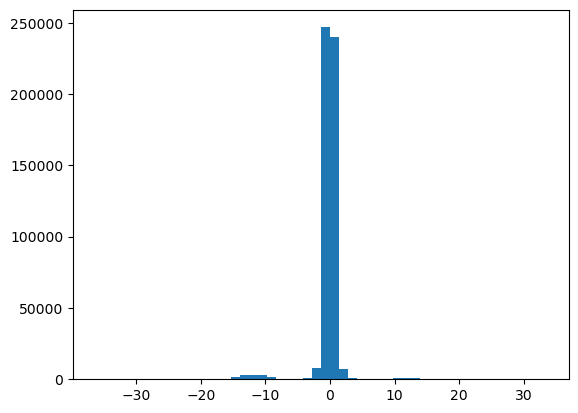

In [4]:
hist = plt.hist(df['log2fold_treated_control'], bins=50)


In [5]:
summary_stats = check_dexseq_results(results_file)

Loading results file...

=== Basic Statistics ===
Total number of tests: 521736
Number of NA p-values: 0
Number of NA adjusted p-values: 0
Number of significant results (padj < 0.05): 519126
Number of significant results (padj < 0.1): 519584

=== Fold Change Statistics ===
count    521191.000000
mean         -0.226736
std           2.378084
min         -36.328054
25%          -0.201142
50%          -0.008559
75%           0.174384
max          33.535336
Name: log2fold_treated_control, dtype: float64

=== Potential Issues ===
Number of potentially problematic results: 50524

Sample of problematic results:
                groupID featureID  log2fold_treated_control  dispersion  \
16   ENSG00000000003.15      E017                -10.346867    0.044316   
61   ENSG00000000419.14      E037                 10.565897    0.051396   
84   ENSG00000000460.17      E002                -10.683699    0.055891   
87   ENSG00000000460.17      E006                 -9.683355    0.093720   
129  ENSG0000

/home/kubacki.michal/.conda/envs/jupyter_nb/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)



=== Checking Problematic Genes ===

Results for ENSG00000285404.1:
       featureID  log2fold_treated_control         pvalue           padj  \
161835      E001                       NaN   0.000000e+00   0.000000e+00   
161836      E002                       NaN   0.000000e+00   0.000000e+00   
161837      E003                       NaN   0.000000e+00   0.000000e+00   
161838      E004                       NaN   0.000000e+00   0.000000e+00   
161839      E005                       NaN  5.156697e-245  8.029014e-245   

        dispersion  
161835    0.053427  
161836    0.059300  
161837    0.059300  
161838    0.066385  
161839    0.115896  

Results for ENSG00000128245.15:
       featureID  log2fold_treated_control         pvalue           padj  \
161835      E001                       NaN   0.000000e+00   0.000000e+00   
161836      E002                       NaN   0.000000e+00   0.000000e+00   
161837      E003                       NaN   0.000000e+00   0.000000e+00   
161838      

In [6]:
# Print summary
print("\n=== Analysis Summary ===")
for key, value in summary_stats.items():
    print(f"{key}: {value}")


=== Analysis Summary ===
total_tests: 521736
significant_005: 519126
significant_01: 519584
na_pvalues: 0
problematic_count: 50524
median_dispersion: 0.019585848482279553
median_fold_change: -0.0085588454799934


In [7]:
matching_rows = df[df['groupID'] == 'ENSG00000169057.24']


In [8]:
matching_rows.head()

,Unnamed: 0,groupID,featureID,exonBaseMean,dispersion,stat,pvalue,padj,control,treated,log2fold_treated_control,genomicData.seqnames,genomicData.start,genomicData.end,genomicData.width,genomicData.strand,countData.EDO_1,countData.EDO_2,countData.EDO_3,countData.ND1_1,countData.ND1_2,countData.ND1_3,countData.PW1_1,countData.PW1_2,countData.PW1_3
318988,ENSG00000169057.24:E001,ENSG00000169057.24,E001,4375.223395,0.007037,82.695505,1.103822e-18,1.156473e-18,NaN,NaN,NaN,chrX,154021573,154030238,8666,-,4588,4739,3446,3926,4125,3587,4021,6008,6056
318989,ENSG00000169057.24:E002,ENSG00000169057.24,E002,307.309188,0.006608,4506.781027,0.000000e+00,0.000000e+00,NaN,NaN,NaN,chrX,154030239,154030604,366,-,318,338,246,271,285,251,275,430,435
318990,ENSG00000169057.24:E003,ENSG00000169057.24,E003,163.054962,0.010040,3970.493142,0.000000e+00,0.000000e+00,NaN,NaN,NaN,chrX,154030605,154030842,238,-,155,180,107,161,118,140,156,244,272
318991,ENSG00000169057.24:E004,ENSG00000169057.24,E004,103.492739,0.006654,6527.009099,0.000000e+00,0.000000e+00,NaN,NaN,NaN,chrX,154030843,154030936,94,-,83,103,73,103,95,92,95,164,165
318992,ENSG00000169057.24:E005,ENSG00000169057.24,E005,142.462102,0.005636,6902.218713,0.000000e+00,0.000000e+00,NaN,NaN,NaN,chrX,154030937,154031268,332,-,130,140,110,134,132,118,141,210,212


In [9]:
matching_rows.control.notna().sum()

0

In [10]:
matching_rows.treated.notna().sum()

0

In [11]:
# Calculate mean counts for control and treated groups
control_counts = matching_rows[['countData.EDO_1', 'countData.EDO_2', 'countData.EDO_3', 
                              'countData.ND1_1', 'countData.ND1_2', 'countData.ND1_3']].mean(axis=1)
treated_counts = matching_rows[['countData.PW1_1', 'countData.PW1_2', 'countData.PW1_3']].mean(axis=1)

# Calculate log2 fold change and add p-values
manual_log2fc = np.log2(treated_counts) - np.log2(control_counts)
results = pd.DataFrame({
    'featureID': matching_rows['featureID'],
    'log2FoldChange': manual_log2fc,
    'pvalue': matching_rows['pvalue'],
    'padj': matching_rows['padj'],
    'control': control_counts,
    'treated': treated_counts,
    'log2fold_treated_control': manual_log2fc,
    'genomicData.seqnames': matching_rows['genomicData.seqnames'],
    'genomicData.start': matching_rows['genomicData.start'],
    'genomicData.end': matching_rows['genomicData.end'],
    'genomicData.width': matching_rows['genomicData.width'],
    'genomicData.strand': matching_rows['genomicData.strand'],
    'countData.EDO_1': matching_rows['countData.EDO_1'],
    'countData.EDO_2': matching_rows['countData.EDO_2'],
    'countData.EDO_3': matching_rows['countData.EDO_3'],
    'countData.ND1_1': matching_rows['countData.ND1_2'],
    'countData.ND1_2': matching_rows['countData.ND1_2'],
    'countData.ND1_3': matching_rows['countData.ND1_3'],
    'countData.PW1_1': matching_rows['countData.PW1_1'],
    'countData.PW1_2': matching_rows['countData.PW1_2'],
    'countData.PW1_3': matching_rows['countData.PW1_3']
})

# Sort by adjusted p-value
results = results.sort_values('padj')

/home/kubacki.michal/.conda/envs/jupyter_nb/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [12]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
results

,featureID,log2FoldChange,pvalue,padj,control,treated,log2fold_treated_control,genomicData.seqnames,genomicData.start,genomicData.end,genomicData.width,genomicData.strand,countData.EDO_1,countData.EDO_2,countData.EDO_3,countData.ND1_1,countData.ND1_2,countData.ND1_3,countData.PW1_1,countData.PW1_2,countData.PW1_3
318989,E002,0.415881,0.000000e+00,0.000000e+00,284.833333,380.000000,0.415881,chrX,154030239,154030604,366,-,318,338,246,285,285,251,275,430,435
318990,E003,0.642448,0.000000e+00,0.000000e+00,143.500000,224.000000,0.642448,chrX,154030605,154030842,238,-,155,180,107,118,118,140,156,244,272
318991,E004,0.627258,0.000000e+00,0.000000e+00,91.500000,141.333333,0.627258,chrX,154030843,154030936,94,-,83,103,73,95,95,92,95,164,165
318992,E005,0.559562,0.000000e+00,0.000000e+00,127.333333,187.666667,0.559562,chrX,154030937,154031268,332,-,130,140,110,132,132,118,141,210,212
318994,E007,0.472315,0.000000e+00,0.000000e+00,113.166667,157.000000,0.472315,chrX,154031287,154031369,83,-,115,127,88,136,136,107,111,180,180
318993,E006,0.662965,0.000000e+00,0.000000e+00,48.000000,76.000000,0.662965,chrX,154031269,154031286,18,-,46,57,44,49,49,41,49,83,96
318995,E008,0.442556,0.000000e+00,0.000000e+00,121.166667,164.666667,0.442556,chrX,154031370,154031395,26,-,114,129,93,163,163,117,121,192,181
318996,E009,0.418844,0.000000e+00,0.000000e+00,126.166667,168.666667,0.418844,chrX,154031396,154031450,55,-,116,133,100,170,170,121,129,202,175
319000,E013,0.623716,0.000000e+00,0.000000e+00,75.500000,116.333333,0.623716,chrX,154032434,154032434,1,-,74,83,67,83,83,59,72,138,139
318997,E010,0.346352,0.000000e+00,0.000000e+00,109.333333,139.000000,0.346352,chrX,154032207,154032216,10,-,92,123,88,148,148,105,101,171,145


# Select significant results

In [13]:
df_sig = df[df['padj'] < 0.05]

In [14]:
print(df.shape)
print(df_sig.shape)

(521736, 25)
(519126, 25)


In [15]:
df = df_sig

# Remove overlapping genes

In [16]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
df[df['groupID'].str.contains('\+')].head()

,Unnamed: 0,groupID,featureID,exonBaseMean,dispersion,stat,pvalue,padj,control,treated,log2fold_treated_control,genomicData.seqnames,genomicData.start,genomicData.end,genomicData.width,genomicData.strand,countData.EDO_1,countData.EDO_2,countData.EDO_3,countData.ND1_1,countData.ND1_2,countData.ND1_3,countData.PW1_1,countData.PW1_2,countData.PW1_3
575,ENSG00000002822.16+ENSG00000122687.19+ENSG00000286192.1:E001,ENSG00000002822.16+ENSG00000122687.19+ENSG00000286192.1,E001,0.536916,0.041447,1887.091874,0.0,0.0,1.597294,0.939031,-1.537197,chr7,1815793,1815793,1,-,0,1,0,1,1,1,0,1,0
576,ENSG00000002822.16+ENSG00000122687.19+ENSG00000286192.1:E002,ENSG00000002822.16+ENSG00000122687.19+ENSG00000286192.1,E002,0.536916,0.041447,1887.091874,0.0,0.0,1.597294,0.939031,-1.537197,chr7,1815794,1815794,1,-,0,1,0,1,1,1,0,1,0
577,ENSG00000002822.16+ENSG00000122687.19+ENSG00000286192.1:E003,ENSG00000002822.16+ENSG00000122687.19+ENSG00000286192.1,E003,14.452441,0.018770,2893.809896,0.0,0.0,7.079699,6.199785,-0.413438,chr7,1815795,1815803,9,-,14,19,7,10,22,14,18,13,15
578,ENSG00000002822.16+ENSG00000122687.19+ENSG00000286192.1:E004,ENSG00000002822.16+ENSG00000122687.19+ENSG00000286192.1,E004,34.308638,0.011535,3707.330284,0.0,0.0,10.165546,9.595819,-0.195260,chr7,1815804,1815815,12,-,30,35,30,26,44,29,30,47,46
579,ENSG00000002822.16+ENSG00000122687.19+ENSG00000286192.1:E005,ENSG00000002822.16+ENSG00000122687.19+ENSG00000286192.1,E005,131.484201,0.011952,2340.306703,0.0,0.0,16.693577,16.753098,0.015076,chr7,1815816,1816081,266,-,112,124,106,121,157,88,144,190,180


In [17]:
df = df[~df['groupID'].str.contains('\+')]

In [18]:
df.head()

,Unnamed: 0,groupID,featureID,exonBaseMean,dispersion,stat,pvalue,padj,control,treated,log2fold_treated_control,genomicData.seqnames,genomicData.start,genomicData.end,genomicData.width,genomicData.strand,countData.EDO_1,countData.EDO_2,countData.EDO_3,countData.ND1_1,countData.ND1_2,countData.ND1_3,countData.PW1_1,countData.PW1_2,countData.PW1_3
0,ENSG00000000003.15:E001,ENSG00000000003.15,E001,9.064419,0.016163,3928.904378,0.000000e+00,0.000000e+00,5.931265,5.009454,-0.513830,chrX,100627108,100627108,1,-,10,12,6,2,10,8,12,10,14
1,ENSG00000000003.15:E002,ENSG00000000003.15,E002,1364.225638,0.007380,465.843450,6.972364e-102,8.791361e-102,31.857029,31.513293,-0.075000,chrX,100627109,100629986,2878,-,1106,1345,750,970,1266,1057,1521,2781,2375
2,ENSG00000000003.15:E003,ENSG00000000003.15,E003,443.805530,0.009201,1962.650578,0.000000e+00,0.000000e+00,24.503872,24.252599,-0.056804,chrX,100630759,100630866,108,-,375,434,254,277,397,359,471,926,802
3,ENSG00000000003.15:E004,ENSG00000000003.15,E004,1.978581,0.020921,3476.876104,0.000000e+00,0.000000e+00,2.634388,2.801898,0.180282,chrX,100632063,100632068,6,-,1,2,1,1,4,0,2,5,4
4,ENSG00000000003.15:E005,ENSG00000000003.15,E005,330.134019,0.007735,2830.512068,0.000000e+00,0.000000e+00,22.609421,22.418042,-0.044010,chrX,100632485,100632540,56,-,269,321,184,215,299,267,354,675,613


# Check problematic genes

In [19]:
# List of problematic genes from the error message
# problematic_genes = ['ENSG00000285404.1', 'ENSG00000100150.19', 
#                     'ENSG00000128245.15', 'ENSG00000252909.1']

# Create masks for each condition
extreme_fc_mask = (df['log2fold_treated_control'].abs() > 5)
high_disp_mask = (df['dispersion'] > 10)
missing_vals_mask = (
    df['log2fold_treated_control'].isna() |
    df['pvalue'].isna() |
    df['padj'].isna()
)
extreme_stat_mask = (df['stat'].abs() > 10000)
# problematic_genes_mask = df['groupID'].str.contains('|'.join(problematic_genes), regex=True)

# Print counts for each condition
print(f"Records with extreme fold changes (>5): {extreme_fc_mask.sum()}")
print(f"Records with high dispersion (>10): {high_disp_mask.sum()}")
print(f"Records with missing values: {missing_vals_mask.sum()}")
print(f"Records with extreme test statistics (>10000): {extreme_stat_mask.sum()}")
# print(f"Records from problematic genes: {problematic_genes_mask.sum()}")

Records with extreme fold changes (>5): 13691
Records with high dispersion (>10): 0
Records with missing values: 62
Records with extreme test statistics (>10000): 22703


In [20]:
df.columns

Index(['Unnamed: 0', 'groupID', 'featureID', 'exonBaseMean', 'dispersion',
       'stat', 'pvalue', 'padj', 'control', 'treated',
       'log2fold_treated_control', 'genomicData.seqnames', 'genomicData.start',
       'genomicData.end', 'genomicData.width', 'genomicData.strand',
       'countData.EDO_1', 'countData.EDO_2', 'countData.EDO_3',
       'countData.ND1_1', 'countData.ND1_2', 'countData.ND1_3',
       'countData.PW1_1', 'countData.PW1_2', 'countData.PW1_3'],
      dtype='object')

# Examine extreme test statistics

In [21]:
# Print genes with extreme test statistics
# print(list(df[extreme_stat_mask]['groupID'].unique()))
df[extreme_stat_mask].head()

,Unnamed: 0,groupID,featureID,exonBaseMean,dispersion,stat,pvalue,padj,control,treated,log2fold_treated_control,genomicData.seqnames,genomicData.start,genomicData.end,genomicData.width,genomicData.strand,countData.EDO_1,countData.EDO_2,countData.EDO_3,countData.ND1_1,countData.ND1_2,countData.ND1_3,countData.PW1_1,countData.PW1_2,countData.PW1_3
863,ENSG00000003393.16:E001,ENSG00000003393.16,E001,11.697157,0.002541,20525.076598,0.0,0.0,6.242655,5.713384,-0.272195,chr2,201700267,201700513,247,-,20,15,10,15,4,5,11,13,13
864,ENSG00000003393.16:E002,ENSG00000003393.16,E002,18.889202,0.001698,26604.916049,0.0,0.0,7.828913,7.257410,-0.241117,chr2,201700514,201700559,46,-,26,18,12,21,17,19,11,27,24
865,ENSG00000003393.16:E003,ENSG00000003393.16,E003,18.472341,0.001728,26315.567648,0.0,0.0,7.766018,7.149807,-0.262434,chr2,201700560,201700560,1,-,26,17,11,21,17,19,11,25,24
866,ENSG00000003393.16:E004,ENSG00000003393.16,E004,18.472341,0.001728,26315.567648,0.0,0.0,7.766018,7.149807,-0.262434,chr2,201700561,201700561,1,-,26,17,11,21,17,19,11,25,24
867,ENSG00000003393.16:E005,ENSG00000003393.16,E005,20.188860,0.001718,26306.611970,0.0,0.0,8.012901,7.570321,-0.181837,chr2,201700562,201700564,3,-,26,18,11,24,18,22,14,25,29


In [22]:
df.sort_values('stat', ascending=False)[:10]

,Unnamed: 0,groupID,featureID,exonBaseMean,dispersion,stat,pvalue,padj,control,treated,log2fold_treated_control,genomicData.seqnames,genomicData.start,genomicData.end,genomicData.width,genomicData.strand,countData.EDO_1,countData.EDO_2,countData.EDO_3,countData.ND1_1,countData.ND1_2,countData.ND1_3,countData.PW1_1,countData.PW1_2,countData.PW1_3
261625,ENSG00000155506.18:E016,ENSG00000155506.18,E016,659.429326,0.000447,63305.493904,0.0,0.0,26.511968,26.752889,0.053641,chr5,154793650,154793723,74,+,588,657,476,635,652,585,646,914,981
261654,ENSG00000155506.18:E045,ENSG00000155506.18,E045,529.238438,0.000508,60978.314891,0.0,0.0,25.168404,25.186281,0.004017,chr5,154811247,154811351,105,+,499,501,402,504,558,453,501,714,779
261626,ENSG00000155506.18:E017,ENSG00000155506.18,E017,517.395431,0.000525,59837.306577,0.0,0.0,24.868370,25.315753,0.100595,chr5,154793800,154793824,25,+,446,515,371,484,511,457,535,717,780
261647,ENSG00000155506.18:E038,ENSG00000155506.18,E038,578.648105,0.000509,59645.375348,0.0,0.0,25.853190,25.549756,-0.067944,chr5,154804221,154804307,87,+,547,563,438,580,617,500,532,775,803
261633,ENSG00000155506.18:E024,ENSG00000155506.18,E024,667.575011,0.000489,59183.214958,0.0,0.0,26.962954,26.084921,-0.195619,chr5,154795175,154795186,12,+,686,701,507,642,701,615,570,813,910
261657,ENSG00000155506.18:E048,ENSG00000155506.18,E048,573.487530,0.000539,57313.404813,0.0,0.0,25.538715,25.976068,0.097895,chr5,154811513,154811640,128,+,531,550,441,546,560,461,560,823,872
125653,ENSG00000115306.16:E045,ENSG00000115306.16,E045,451.054240,0.000804,56644.285549,0.0,0.0,24.129997,23.609628,-0.118134,chr2,54660291,54662308,2018,+,444,499,343,481,502,421,370,537,529
261655,ENSG00000155506.18:E046,ENSG00000155506.18,E046,419.231556,0.000644,53973.693911,0.0,0.0,23.520612,23.994457,0.107677,chr5,154811352,154811356,5,+,379,373,323,393,429,355,405,604,647
261642,ENSG00000155506.18:E033,ENSG00000155506.18,E033,594.149906,0.000587,53355.918172,0.0,0.0,25.830784,26.030699,0.044698,chr5,154802350,154802399,50,+,534,563,448,549,588,549,611,791,866
366483,ENSG00000184009.13:E026,ENSG00000184009.13,E026,551.993080,0.001447,52527.104771,0.0,0.0,25.239015,25.676504,0.098121,chr17,81512143,81512150,8,-,500,553,429,490,571,487,531,798,762


In [23]:
n_sel = 100 
stat_sel = list(df.sort_values('stat', ascending=False)[:n_sel]['groupID'][~df.sort_values('stat', ascending=False)[:n_sel]['groupID'].str.contains('\+')].unique())
print(stat_sel)


['ENSG00000155506.18', 'ENSG00000115306.16', 'ENSG00000184009.13', 'ENSG00000038382.20', 'ENSG00000125462.19', 'ENSG00000117139.18', 'ENSG00000132466.19', 'ENSG00000172270.22', 'ENSG00000115464.15', 'ENSG00000125107.19', 'ENSG00000204463.13', 'ENSG00000151914.21', 'ENSG00000197535.15', 'ENSG00000163618.18', 'ENSG00000078369.18']


In [24]:
# Initialize mygene client
mg = mygene.MyGeneInfo()

# Remove version numbers from ENSEMBL IDs
stat_sel_no_version = [id.split('.')[0] for id in stat_sel]

# Query the gene symbols
# results = mg.querymany(stat_sel_no_version, scopes='ensembl.gene', fields='symbol', species='human')
results = mg.querymany(stat_sel_no_version, 
                      scopes='ensembl.gene', 
                      fields='symbol', 
                      species='human',
                      assembly='GRCh38')

# Create a dictionary mapping ENSEMBL IDs to symbols
gene_map = {res['query']: res.get('symbol', 'Not found') for res in results}

gene_symbols = [gene_map[ensembl_id.split('.')[0]] for ensembl_id in stat_sel]

ensembl_to_symbol = dict(zip(stat_sel, gene_symbols))

# Print results
for ensembl, symbol in ensembl_to_symbol.items():
    print(f"{ensembl}: {symbol}")

ENSG00000155506.18: LARP1
ENSG00000115306.16: SPTBN1
ENSG00000184009.13: ACTG1
ENSG00000038382.20: TRIO
ENSG00000125462.19: MIR9-1HG
ENSG00000117139.18: KDM5B
ENSG00000132466.19: ANKRD17
ENSG00000172270.22: BSG
ENSG00000115464.15: USP34
ENSG00000125107.19: CNOT1
ENSG00000204463.13: BAG6
ENSG00000151914.21: DST
ENSG00000197535.15: MYO5A
ENSG00000163618.18: CADPS
ENSG00000078369.18: GNB1


In [25]:
# Examine records with extreme test statistics
extreme_stat_records = df[extreme_stat_mask][['groupID', 'featureID', 'stat', 'pvalue', 'padj', 'log2fold_treated_control', 'dispersion']]
print("\nSample of records with extreme test statistics:")
extreme_stat_records.head()



Sample of records with extreme test statistics:


,groupID,featureID,stat,pvalue,padj,log2fold_treated_control,dispersion
863,ENSG00000003393.16,E001,20525.076598,0.0,0.0,-0.272195,0.002541
864,ENSG00000003393.16,E002,26604.916049,0.0,0.0,-0.241117,0.001698
865,ENSG00000003393.16,E003,26315.567648,0.0,0.0,-0.262434,0.001728
866,ENSG00000003393.16,E004,26315.567648,0.0,0.0,-0.262434,0.001728
867,ENSG00000003393.16,E005,26306.611970,0.0,0.0,-0.181837,0.001718


# Examine extreme fold changes

In [26]:
# Print genes with extreme fold changes
# print(list(df[extreme_fc_mask]['groupID'].unique()))
df[extreme_fc_mask].head()

,Unnamed: 0,groupID,featureID,exonBaseMean,dispersion,stat,pvalue,padj,control,treated,log2fold_treated_control,genomicData.seqnames,genomicData.start,genomicData.end,genomicData.width,genomicData.strand,countData.EDO_1,countData.EDO_2,countData.EDO_3,countData.ND1_1,countData.ND1_2,countData.ND1_3,countData.PW1_1,countData.PW1_2,countData.PW1_3
16,ENSG00000000003.15:E017,ENSG00000000003.15,E017,0.424628,0.044316,1985.946299,0.000000e+00,0.000000e+00,1.531112,0.042519,-10.346867,chrX,100639945,100639991,47,-,1,0,2,0,0,0,0,0,0
61,ENSG00000000419.14:E037,ENSG00000000419.14,E037,0.282341,0.051396,1621.257073,0.000000e+00,0.000000e+00,0.042780,1.661381,10.565897,chr20,50958741,50959140,400,-,0,0,0,0,0,0,1,0,2
84,ENSG00000000460.17:E002,ENSG00000000460.17,E002,0.222273,0.055891,1249.492076,4.745076e-272,7.671664e-272,1.096678,0.027071,-10.683699,chr1,169683469,169683625,157,+,0,0,0,1,1,0,0,0,0
87,ENSG00000000460.17:E006,ENSG00000000460.17,E006,0.108077,0.093720,843.762088,6.017145e-184,8.593950e-184,0.775805,0.027071,-9.683355,chr1,169794730,169794905,176,+,0,1,0,0,0,0,0,0,0
129,ENSG00000000971.16:E008,ENSG00000000971.16,E008,0.394678,0.636638,108.934934,2.213500e-24,2.358157e-24,0.032508,1.929387,11.792232,chr1,196676988,196677475,488,+,0,0,0,0,0,0,0,3,2


In [27]:
df.sort_values('log2fold_treated_control', key=abs, ascending=False)[:10]


,Unnamed: 0,groupID,featureID,exonBaseMean,dispersion,stat,pvalue,padj,control,treated,log2fold_treated_control,genomicData.seqnames,genomicData.start,genomicData.end,genomicData.width,genomicData.strand,countData.EDO_1,countData.EDO_2,countData.EDO_3,countData.ND1_1,countData.ND1_2,countData.ND1_3,countData.PW1_1,countData.PW1_2,countData.PW1_3
149876,ENSG00000123572.17:E032,ENSG00000123572.17,E032,5.179229,2.372678,19.233449,6.660544e-05,6.739156e-05,4.440830,0.000066,-32.116542,chrX,105948438,105948759,322,+,0,0,0,12,15,17,0,0,0
390083,ENSG00000196834.13:E021,ENSG00000196834.13,E021,0.362087,0.082622,465.796207,7.139023e-102,9.001216e-102,1.652174,0.000026,-31.940155,chr2,130503324,130503445,122,-,0,0,0,2,0,1,0,0,0
390079,ENSG00000196834.13:E017,ENSG00000196834.13,E017,0.108077,0.151142,324.042277,4.316319e-71,5.144747e-71,0.954015,0.000026,-30.339995,chr2,130490670,130490740,71,-,0,1,0,0,0,0,0,0,0
482790,ENSG00000261824.7:E119,ENSG00000261824.7,E119,0.363474,0.792843,171.080335,7.085611e-38,7.850922e-38,0.000059,1.639852,29.537860,chr19,27793892,27793893,2,-,0,0,0,0,0,0,1,0,3
390087,ENSG00000196834.13:E026,ENSG00000196834.13,E026,0.081133,0.176365,291.540797,4.928564e-64,5.794228e-64,0.000038,0.786067,28.687156,chr2,130509668,130509707,40,-,0,0,0,0,0,0,0,0,1
149847,ENSG00000123572.17:E003,ENSG00000123572.17,E003,0.391014,1.006492,65.472464,6.065059e-15,6.286849e-15,1.204656,0.000066,-28.304566,chrX,105822581,105822902,322,+,0,1,1,0,0,1,0,0,0
149845,ENSG00000123572.17:E001,ENSG00000123572.17,E001,0.282937,1.185551,59.188503,1.404041e-13,1.449961e-13,0.994277,0.000066,-27.757132,chrX,105822539,105822552,14,+,0,0,1,0,0,1,0,0,0
149846,ENSG00000123572.17:E002,ENSG00000123572.17,E002,0.282937,1.185551,59.188503,1.404041e-13,1.449961e-13,0.994277,0.000066,-27.749547,chrX,105822553,105822580,28,+,0,0,1,0,0,1,0,0,0
149874,ENSG00000123572.17:E030,ENSG00000123572.17,E030,0.153842,1.395257,53.800921,2.076244e-12,2.137362e-12,0.703072,0.000066,-26.748300,chrX,105945872,105946015,144,+,0,0,1,0,0,0,0,0,0
494438,ENSG00000272168.8:E202,ENSG00000272168.8,E202,1.061682,0.117592,931.437795,5.506209e-203,8.080137e-203,2.097197,0.000202,-26.702272,chr6,22610564,22610640,77,+,2,1,3,0,0,2,0,0,0


In [28]:
n_sel = 100 
fc_sel = list(df.sort_values('log2fold_treated_control', key=abs, ascending=False)[:n_sel]['groupID'][~df.sort_values('log2fold_treated_control', key=abs, ascending=False)[:n_sel]['groupID'].str.contains('\+')].unique())
print(fc_sel)



['ENSG00000123572.17', 'ENSG00000196834.13', 'ENSG00000261824.7', 'ENSG00000272168.8', 'ENSG00000196090.12', 'ENSG00000178104.19', 'ENSG00000185666.15', 'ENSG00000168781.22', 'ENSG00000273079.7', 'ENSG00000162105.20', 'ENSG00000136205.17', 'ENSG00000251209.9', 'ENSG00000008513.16', 'ENSG00000160200.18', 'ENSG00000205592.15', 'ENSG00000146592.17', 'ENSG00000260691.7', 'ENSG00000008086.13', 'ENSG00000168214.21', 'ENSG00000274276.4', 'ENSG00000185304.15', 'ENSG00000177359.20', 'ENSG00000188611.17', 'ENSG00000237945.7', 'ENSG00000215580.11', 'ENSG00000109099.16', 'ENSG00000228696.10', 'ENSG00000164756.13', 'ENSG00000180398.13', 'ENSG00000142178.9']


In [29]:
# Initialize mygene client
mg = mygene.MyGeneInfo()

# Remove version numbers from ENSEMBL IDs
fc_sel_no_version = [id.split('.')[0] for id in fc_sel]

# Query the gene symbols
# results = mg.querymany(fc_sel_no_version, scopes='ensembl.gene', fields='symbol', species='human')
results = mg.querymany(fc_sel_no_version, 
                      scopes='ensembl.gene', 
                      fields='symbol', 
                      species='human',
                      assembly='GRCh38')

# Create a dictionary mapping ENSEMBL IDs to symbols
gene_map = {res['query']: res.get('symbol', 'Not found') for res in results}

gene_symbols = [gene_map[ensembl_id.split('.')[0]] for ensembl_id in fc_sel]

ensembl_to_symbol = dict(zip(fc_sel, gene_symbols))

# Print results
for ensembl, symbol in ensembl_to_symbol.items():
    print(f"{ensembl}: {symbol}")

ENSG00000123572.17: NRK
ENSG00000196834.13: POTEI
ENSG00000261824.7: LINC00662
ENSG00000272168.8: CASC15
ENSG00000196090.12: PTPRT
ENSG00000178104.19: PDE4DIP
ENSG00000185666.15: SYN3
ENSG00000168781.22: PPIP5K1
ENSG00000273079.7: GRIN2B
ENSG00000162105.20: SHANK2
ENSG00000136205.17: TNS3
ENSG00000251209.9: LINC00923
ENSG00000008513.16: ST3GAL1
ENSG00000160200.18: CBS
ENSG00000205592.15: MUC19
ENSG00000146592.17: CREB5
ENSG00000260691.7: ANKRD20A1
ENSG00000008086.13: CDKL5
ENSG00000168214.21: RBPJ
ENSG00000274276.4: LOC102724560
ENSG00000185304.15: RGPD2
ENSG00000177359.20: OVOS2
ENSG00000188611.17: ASAH2
ENSG00000237945.7: LINC00649
ENSG00000215580.11: BCORP1
ENSG00000109099.16: PMP22
ENSG00000228696.10: ARL17B
ENSG00000164756.13: SLC30A8
ENSG00000180398.13: MCFD2
ENSG00000142178.9: SIK1


# Save filtered results

In [33]:
clean_df = df[
    (df['log2fold_treated_control'].notna()) &
    (df['pvalue'].notna()) &
    (df['padj'].notna())
]

# Print summary of filtering
print(f"Original number of records: {len(df)}")
print(f"Number of records after cleaning: {len(clean_df)}")
print(f"Number of records removed: {len(df) - len(clean_df)}")

# Save cleaned results to new CSV file
output_file = "output/dexseq_results_PW1_vs_combined_controls_filtered.csv"
clean_df.to_csv(output_file, index=False)
print(f"\nCleaned results saved to: {output_file}")

# Print summary statistics of cleaned data
print(clean_df['log2fold_treated_control'].describe())

Original number of records: 415118
Number of records after cleaning: 415056
Number of records removed: 62

Cleaned results saved to: output/dexseq_results_PW1_vs_combined_controls_filtered.csv
count    415056.000000
mean         -0.207645
std           2.274334
min         -32.116542
25%          -0.190337
50%          -0.007210
75%           0.169498
max          29.537860
Name: log2fold_treated_control, dtype: float64


In [31]:
extreme_stat_records['groupID'].value_counts()

groupID
ENSG00000109339.24    223
ENSG00000197102.14    175
ENSG00000151914.21    172
ENSG00000127603.31    158
ENSG00000115355.17    149
ENSG00000164199.18    142
ENSG00000145362.21    139
ENSG00000003393.16    130
ENSG00000178104.19    126
ENSG00000115677.18    125
ENSG00000009830.13    116
ENSG00000115464.15    111
ENSG00000186487.20    108
ENSG00000103657.14    107
ENSG00000117139.18    104
ENSG00000196712.18    100
ENSG00000116641.18     97
ENSG00000115760.14     92
ENSG00000151150.22     92
ENSG00000165699.15     92
ENSG00000237187.9      91
ENSG00000156931.16     88
ENSG00000135541.22     88
ENSG00000128656.15     88
ENSG00000132549.20     88
ENSG00000104133.16     87
ENSG00000075539.15     87
ENSG00000038382.20     86
ENSG00000125107.19     86
ENSG00000241973.11     86
ENSG00000130714.19     83
ENSG00000148356.15     83
ENSG00000104517.13     82
ENSG00000159023.22     81
ENSG00000204463.13     80
ENSG00000126217.21     80
ENSG00000185842.16     78
ENSG00000044115.21     78
ENSG

In [34]:
clean_df = df[
    # Remove extreme fold changes (keeping values between -5 and 5)
    (df['log2fold_treated_control'].abs() <= 5) &
    # Remove high dispersion
    (df['dispersion'] <= 10) &
    # Remove missing values
    (df['log2fold_treated_control'].notna()) &
    (df['pvalue'].notna()) &
    (df['padj'].notna()) &
    # Remove extreme test statistics
    (df['stat'].abs() <= 10000)
]

# Print summary of filtering
print(f"Original number of records: {len(df)}")
print(f"Number of records after cleaning: {len(clean_df)}")
print(f"Number of records removed: {len(df) - len(clean_df)}")

# Save cleaned results to new CSV file
output_file = "output/dexseq_results_PW1_vs_combined_controls_filtered_strict.csv"
clean_df.to_csv(output_file, index=False)
print(f"\nCleaned results saved to: {output_file}")

# Print summary statistics of cleaned data
print(clean_df['log2fold_treated_control'].describe())

Original number of records: 415118
Number of records after cleaning: 378662
Number of records removed: 36456

Cleaned results saved to: output/dexseq_results_PW1_vs_combined_controls_filtered_strict.csv
count    378662.000000
mean         -0.001703
std           0.525406
min          -4.981342
25%          -0.176239
50%          -0.002437
75%           0.175018
max           4.955280
Name: log2fold_treated_control, dtype: float64
